In [3]:
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [ ]:
!ls "/content/drive/My Drive/ML-Assignment4"

paul_graham_essays.txt


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from typing import Iterator
# Download NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/prajwal_15/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:

filepath="/content/drive/My Drive/ML-Assignment4/paul_graham_essays.txt"

        # Split the content by two or more newline

# Defining the function to replace tricky characters
def replace_characters(text: str) -> str:
    replacement_rules = {'“': '"', '”': '"', '’': "'", '--': ','}
    for symbol, replacement in replacement_rules.items():
        text = text.replace(symbol, replacement)
    return text

# Defining the function to tokenize and preprocess sentences
def generate_tokenized_sentences(paragraph: str):
    word_tokenizer = RegexpTokenizer(r'[-\'\w]+')
    wrods=[]
    for sentence in sent_tokenize(paragraph):
        # Replace tricky characters
        sentence = replace_characters(sentence)
        sentence = sentence.lower()
        tokenized_sentence = word_tokenizer.tokenize(sentence)

        # Lowercase the sentence

        words.extend(tokenized_sentence)

    return words
        # Append [END] and [START] to the tokenized sentenc
# Initializing an empty list to store tokenized sentences
words = []
with open(filepath, 'r') as file:
        content = file.read()
        words=generate_tokenized_sentences(content)

# Processing each comment in the DataFrame
# Creating a text file to store the tokenized sentences
with open('/content/drive/My Drive/ML-Assignment4/processed_data.txt', 'w', encoding='utf-8') as file:
        file.write(",".join(words))

In [6]:

stoi={}
itos={}
words=[]
with open('./processed_data.txt', 'r') as file:
        content = file.read()
        words=content.split(",")
        chars = sorted(list(set(''.join(content.split(",")))))
        stoi = {s:i+1 for i,s in enumerate(chars)}
        stoi['.'] = 0
        itos = {i:s for s,i in stoi.items()}

print(stoi)


{"'": 1, '-': 2, '0': 3, '1': 4, '2': 5, '3': 6, '4': 7, '5': 8, '6': 9, '7': 10, '8': 11, '9': 12, '_': 13, 'a': 14, 'b': 15, 'c': 16, 'd': 17, 'e': 18, 'f': 19, 'g': 20, 'h': 21, 'i': 22, 'j': 23, 'k': 24, 'l': 25, 'm': 26, 'n': 27, 'o': 28, 'p': 29, 'q': 30, 'r': 31, 's': 32, 't': 33, 'u': 34, 'v': 35, 'w': 36, 'x': 37, 'y': 38, 'z': 39, '²': 40, 'à': 41, 'é': 42, 'ö': 43, '.': 0}


In [7]:
class NextChar(nn.Module):
  def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
    super().__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)
    self.lin1 = nn.Linear(block_size * emb_dim, hidden_size)
    self.lin2 = nn.Linear(hidden_size, vocab_size)
  def forward(self, x):
    x = self.emb(x)
    x = x.view(x.shape[0], -1)
    x = torch.sin(self.lin1(x))
    x = self.lin2(x)
    return x

In [ ]:
len(words)

In [7]:
import time
def train_model(context_len,embed_size,vocab_size):
  block_size = context_len # context length: how many characters do we take to predict the next one?
  X, Y = [], []
  for w in words[:]:

  #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X).to(device)
  Y = torch.tensor(Y).to(device)
  # Train the model
  model = NextChar(block_size, len(stoi), embed_size, 10).to(device)
  model = torch.compile(model)

  loss_fn = nn.CrossEntropyLoss()
  opt = torch.optim.AdamW(model.parameters(), lr=0.01)
  # Mini-batch training
  batch_size = 4096
  print_every = 100
  elapsed_time = []
  for epoch in range(1000):
      start_time = time.time()
      for i in range(0, X.shape[0], batch_size):
          x = X[i:i+batch_size]
          y = Y[i:i+batch_size]
          y_pred = model(x)
          loss = loss_fn(y_pred, y)
          loss.backward()
          opt.step()
          opt.zero_grad()
      end_time = time.time()
      elapsed_time.append(end_time - start_time)
      if epoch % print_every == 0:
          print(epoch, loss.item())

  return model


In [26]:
embedding_size=[2,5,10]
context_length=[3,6,9]
ectuple=[ (e,c)  for e in embedding_size for c in context_length]
i=0
for t in ectuple:
    model=train_model(t[1],t[0],len(stoi))
    torch.save(model.state_dict(),f"./model_{i}.pt")
    i+=1


0 2.3488411903381348
100 2.2826802730560303
200 2.2823286056518555
300 2.2825191020965576
400 2.2839367389678955
500 2.284472703933716
600 2.284761428833008
700 2.2848925590515137
800 2.28494930267334
900 2.2849743366241455
0 2.3678975105285645
100 2.30877947807312
200 2.3081581592559814
300 2.3081579208374023
400 2.3081579208374023
500 2.3081579208374023
600 2.3081579208374023
700 2.3081579208374023
800 2.3081583976745605
900 2.3081579208374023
0 2.381258726119995
100 2.246690511703491
200 2.2467777729034424
300 2.246781349182129
400 2.246781587600708
500 2.246781587600708
600 2.246781587600708


In [8]:
model=train_model(9,10,len(stoi))
torch.save(model.state_dict(),"./model_8.pt")

0 2.1571900844573975
100 2.095332145690918
200 2.0957770347595215
300 2.0943946838378906
400 2.0945703983306885
500 2.0947184562683105
600 2.0950546264648438
700 2.095097541809082
800 2.094733953475952
900 2.0956759452819824


In [21]:
model=train_model(5,2,len(stoi))
torch.save(model.state_dict(),"./model.pt")
model1=NextChar(5,len(stoi),2,10)
model1.load_state_dict(torch.load("./model.pt"),strict=False)
model1.eval()


0 2.350600481033325


NextChar(
  (emb): Embedding(44, 2)
  (lin1): Linear(in_features=10, out_features=10, bias=True)
  (lin2): Linear(in_features=10, out_features=44, bias=True)
)

In [9]:
from sklearn.manifold import TSNE




def plot_emb(emb, itos,title):
    # Get the weights of the embedding layer
    weights = emb.weight.detach().cpu().numpy()

    # Use PCA to reduce the dimensionality to 2
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(weights)

    fig, ax = plt.subplots()
    ax.set_title(title)
    for i in range(len(itos)):
        x, y = X_tsne[i]
        ax.scatter(x, y, color='k')
        ax.text(x + 0.05, y + 0.05, itos[i])

    return ax



In [10]:
emb={"2":0,"5":1,"10":2}
context={"3":0,"6":1,"9":2}

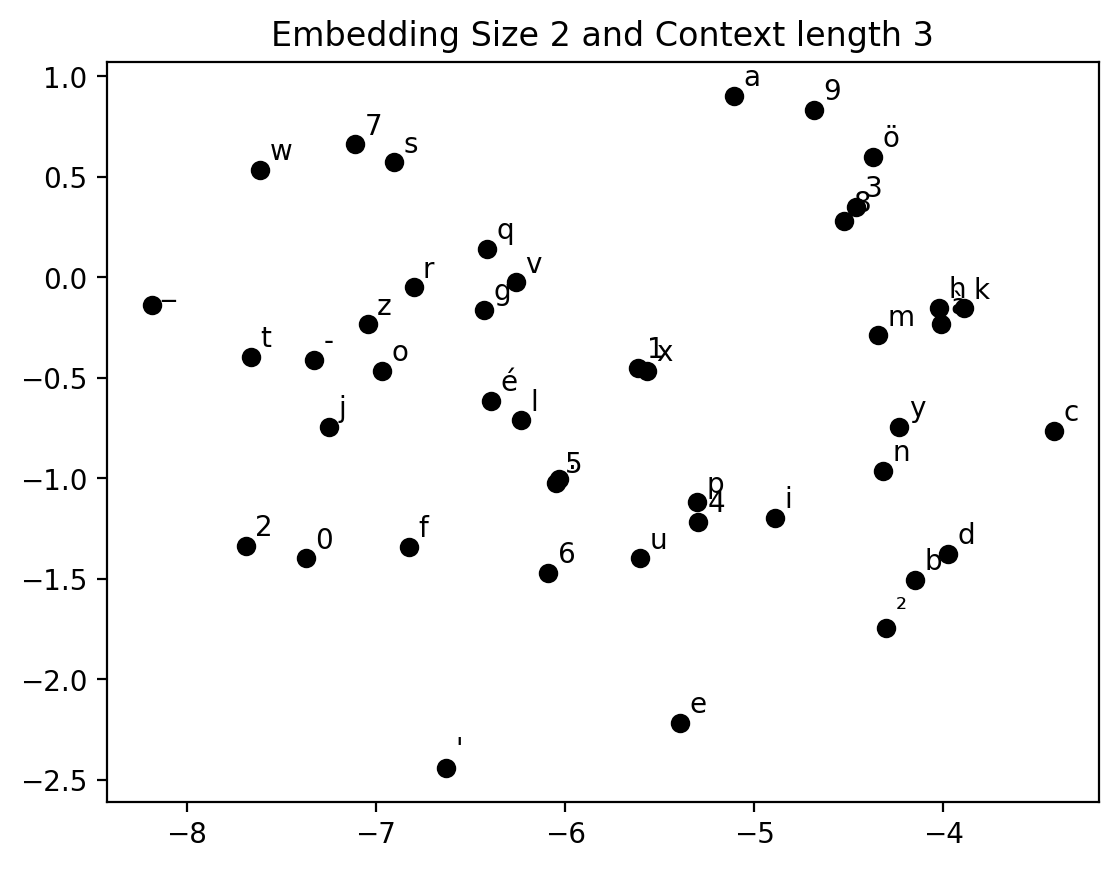

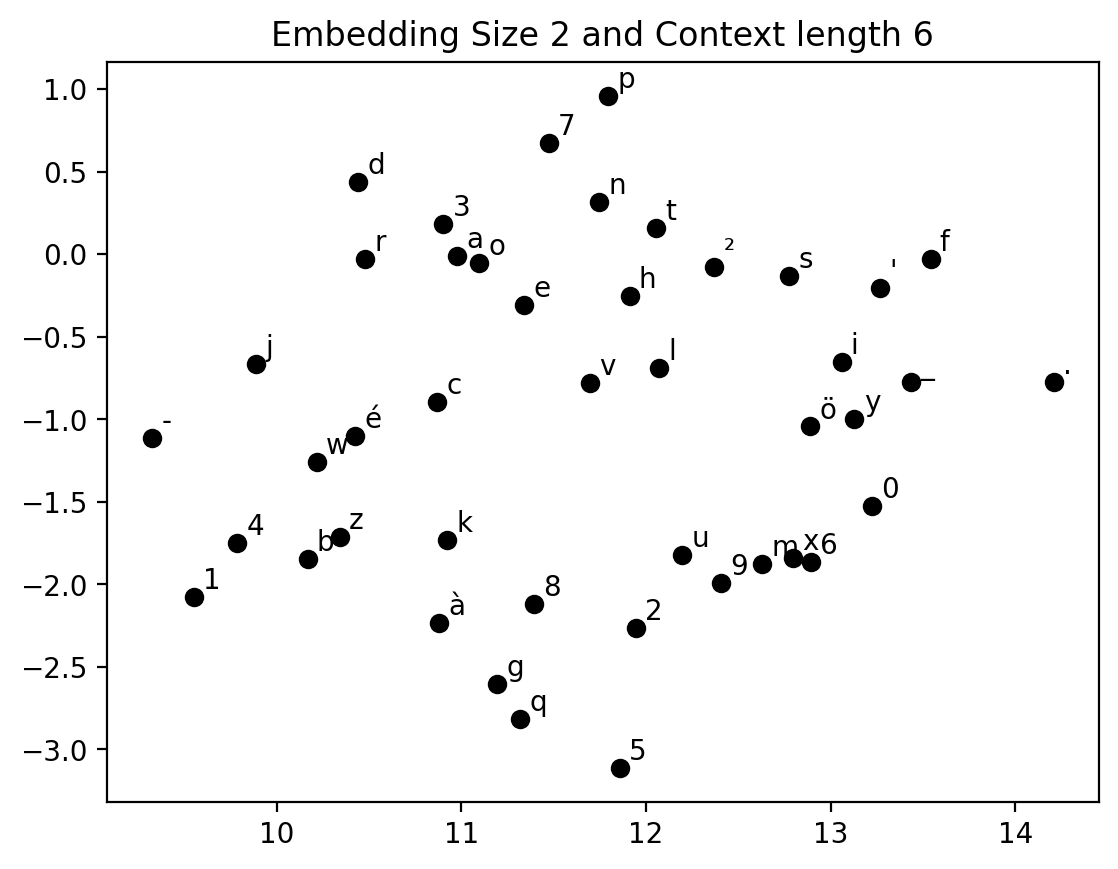

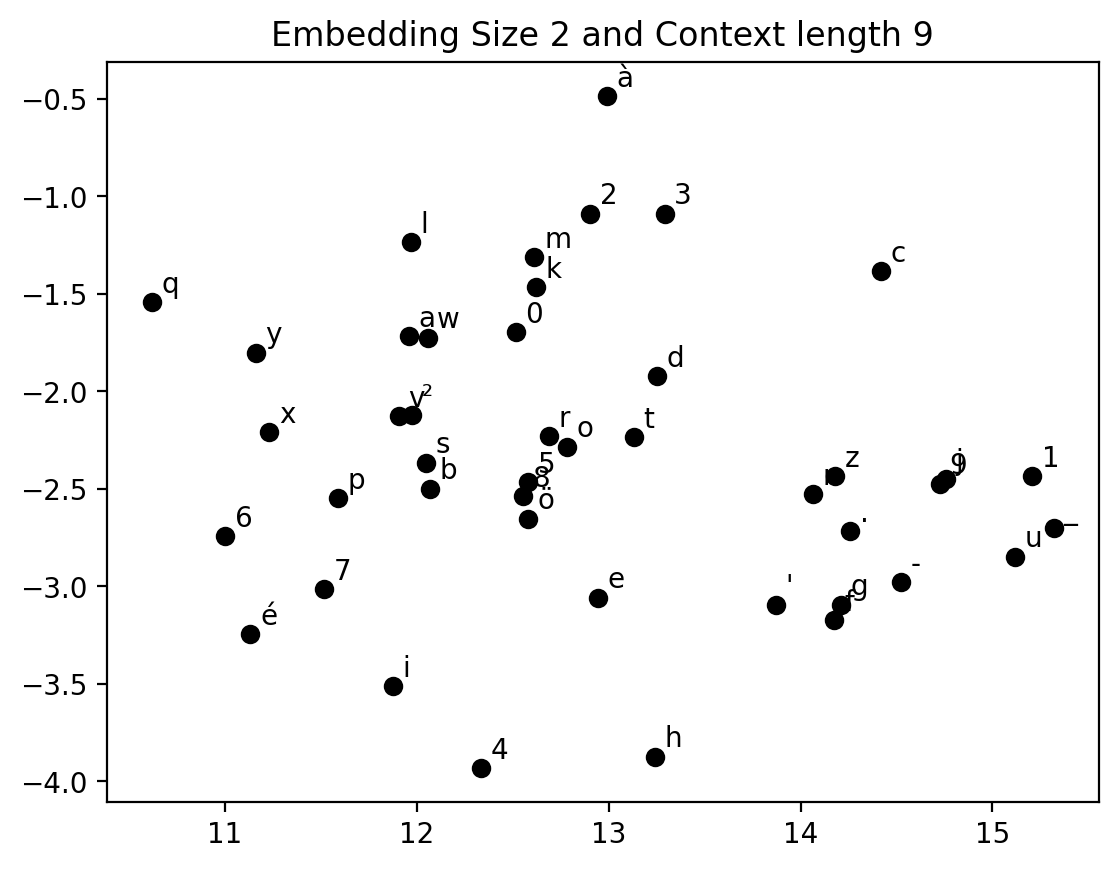

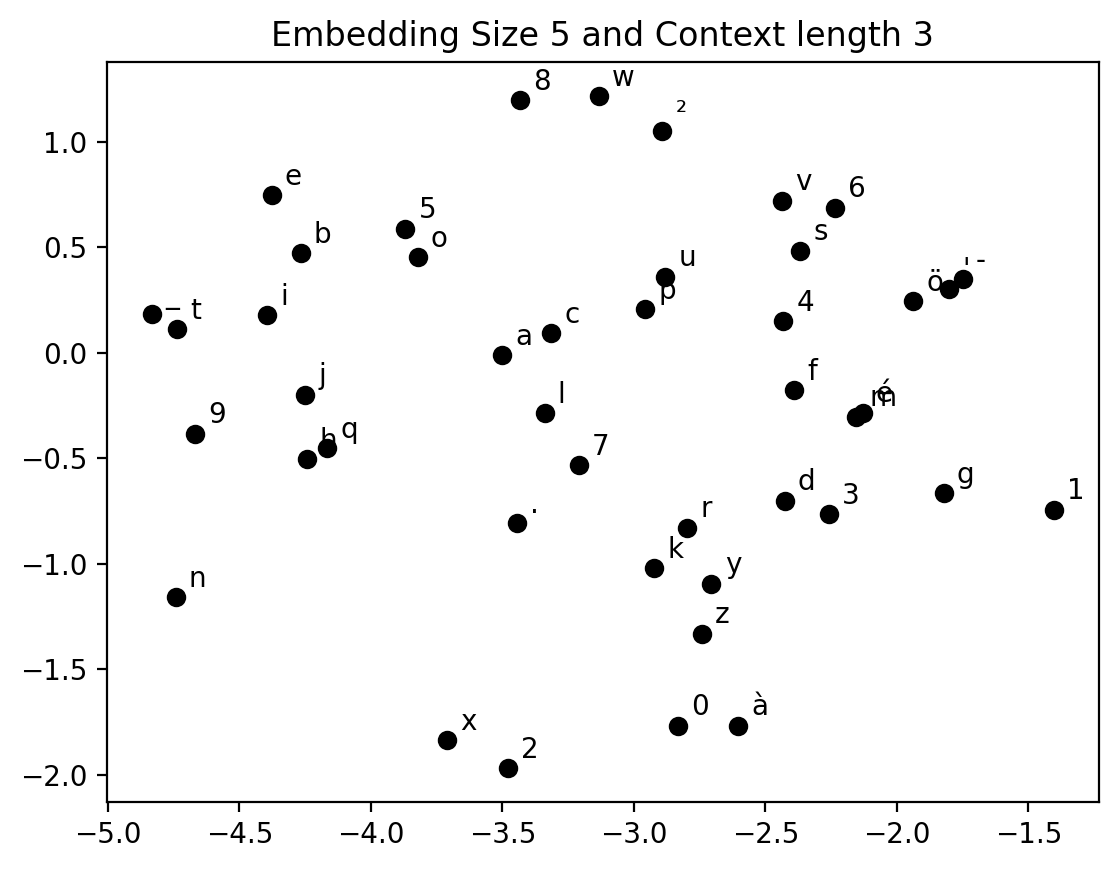

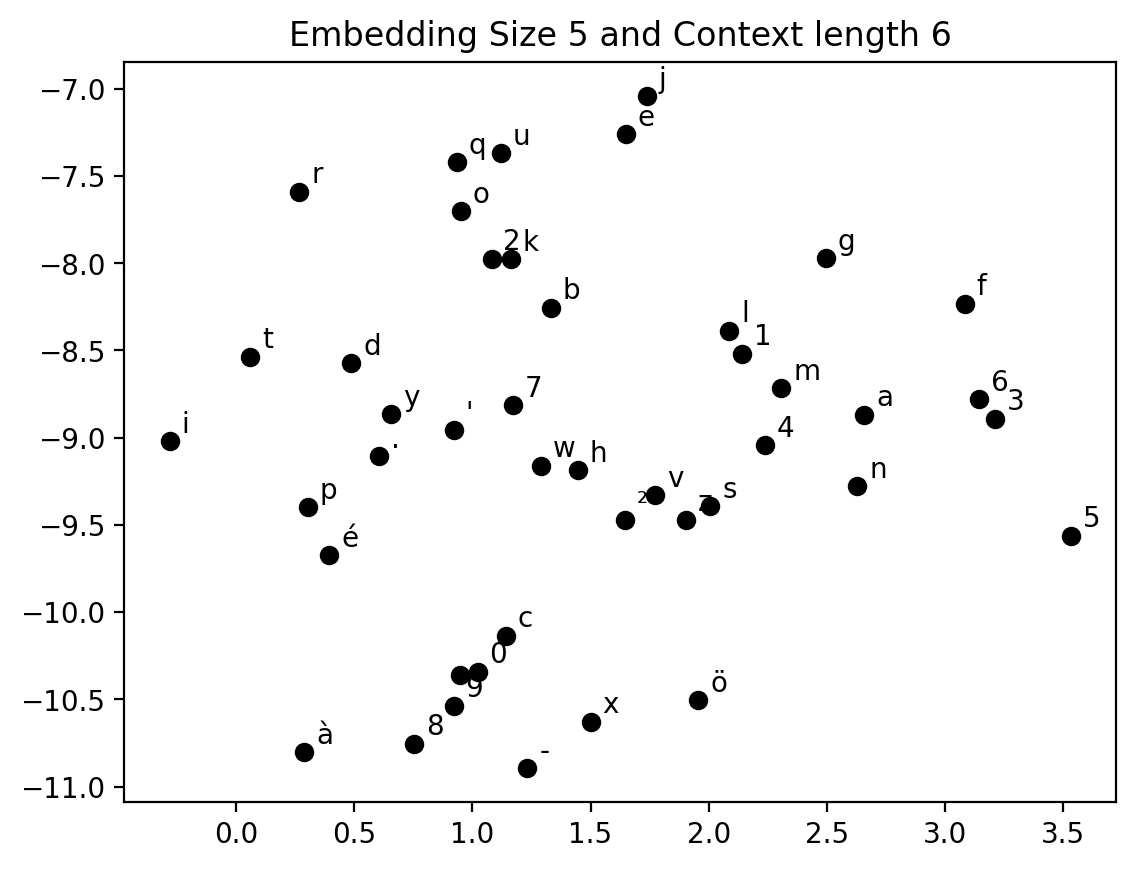

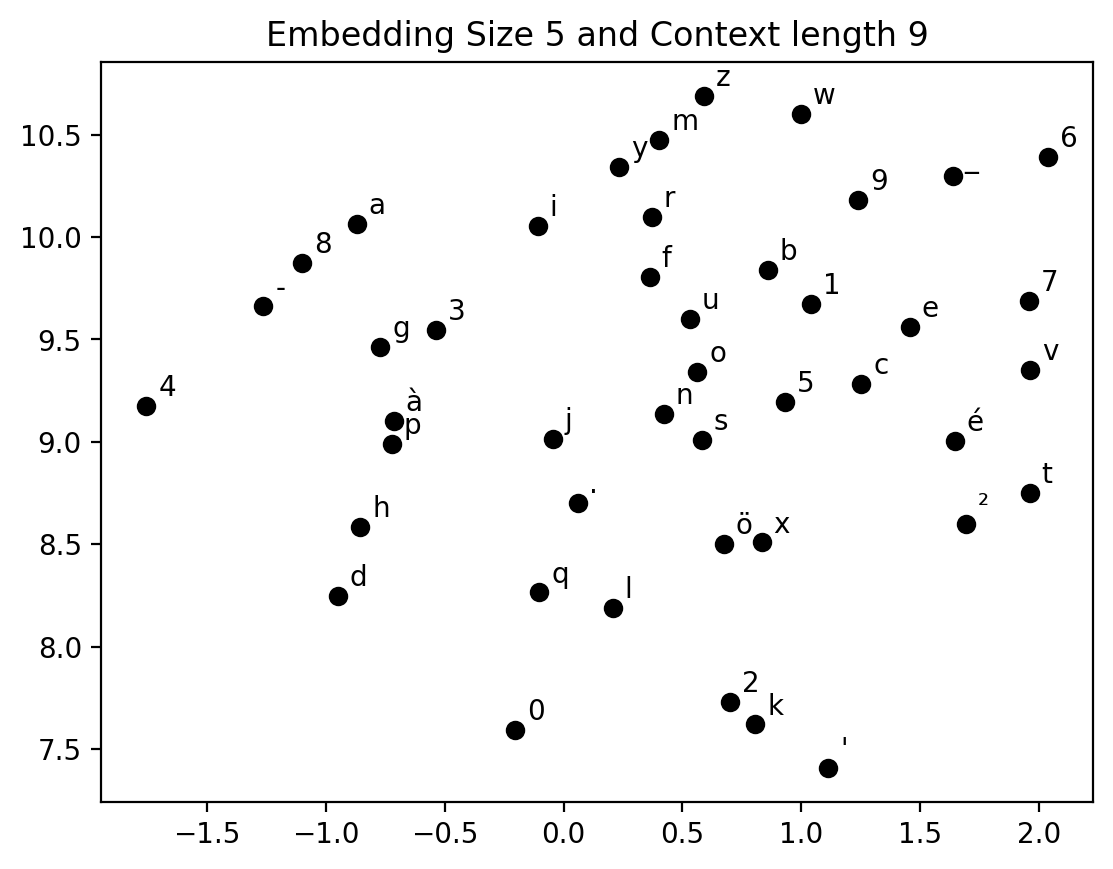

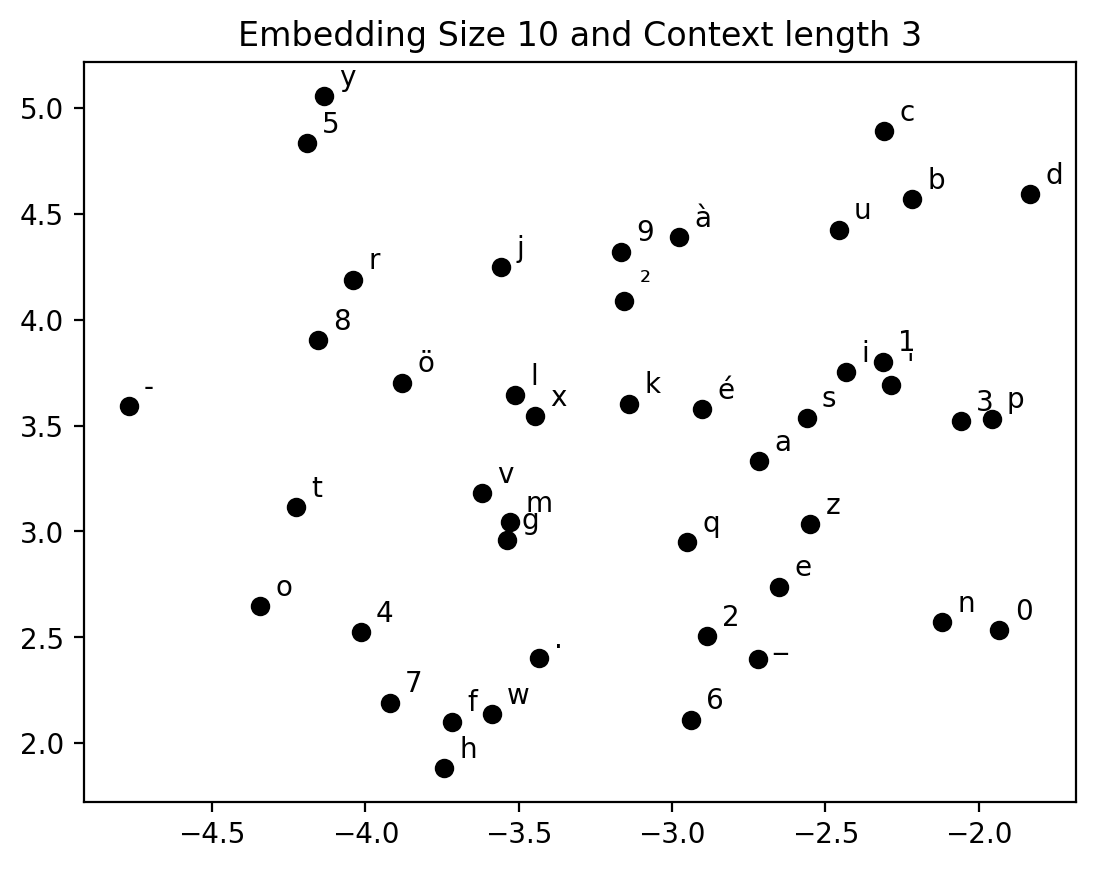

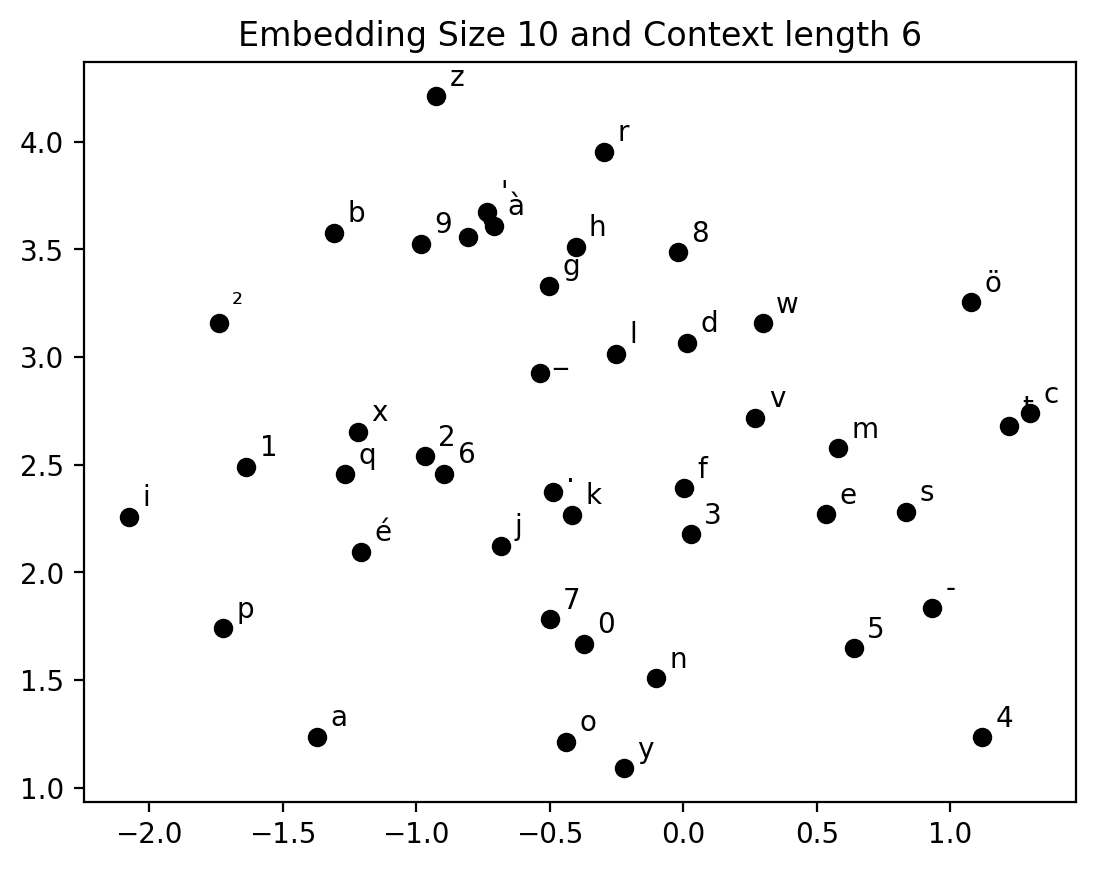

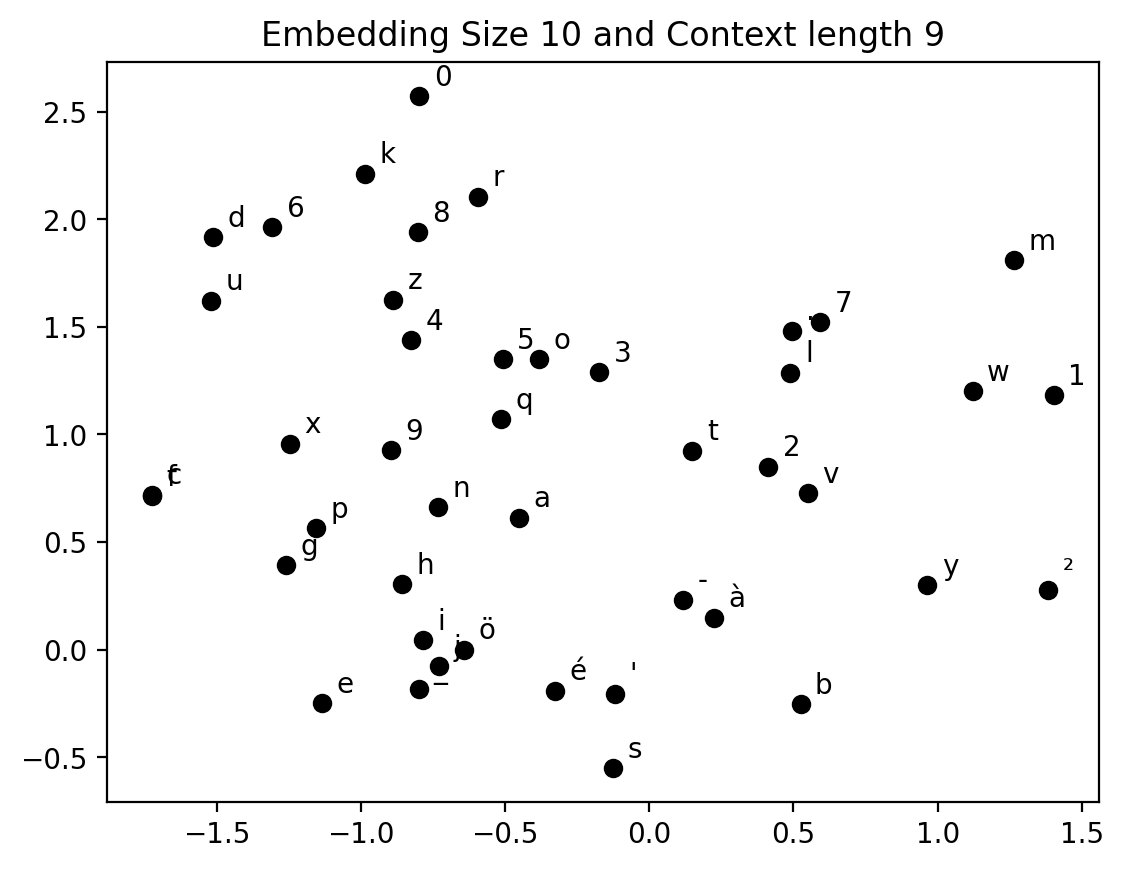

In [11]:
for t in ectuple:
    model_number=emb[str(t[0])]*3+context[str(t[1])]
    model1 = NextChar(t[1],len(stoi),t[0], 10)
    model1.load_state_dict(torch.load(f"./model_{model_number}.pt",map_location=torch.device('cpu')), strict=False)
    plot_emb(model1.emb,itos,f"Embedding Size {t[0]} and Context length {t[1]}")
